# Dealing with Missing Data - Lab

## Introduction

In this lab, we'll work through strategies for data cleaning and dealing with missing values (`NaN`s).

## Objectives
In this lab you will:

- Identify missing values in a dataframe using built-in methods 
- Explain why missing values are a problem in data science 

## Dataset

In this lab, we'll continue working with the _Titanic Survivors_ dataset, which can be found in `'titanic.csv'`.

Before we can get going, we'll need to import the usual libraries.  In the cell below, import:
* `pandas` as `pd`
* `numpy` as `np`
* `matplotlib.pyplot` as `plt`
* set `%matplotlib inline`

In [2]:
# Import necessary libraries below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's get started by reading in the data from the `'titanic.csv'` file and storing it the DataFrame `df`. Subsequently, be sure to preview the data.

In [3]:
# Read the CSV file and store it in a DataFrame
df = pd.read_csv('titanic.csv')
# Preview the first few rows of the DataFrame
print(df.head())


   Unnamed: 0  PassengerId  Survived Pclass  \
0           0            1         0      3   
1           1            2         1      1   
2           2            3         1      3   
3           3            4         1      1   
4           4            5         0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123 

## Find missing values in a DataFrame

Before we can deal with missing values, we first need to find them. There are several easy ways to detect them.  We will start by answering very general questions, such as "does this DataFrame contain any null values?", and then narrowing our focus each time the answer to a question is "yes".

We'll start by checking to see if the DataFrame contains **any** missing values (NaNs) at all. 

**_Hint_**: If you do this correctly, it will require method chaining, and will return a boolean value for each column.  

In [4]:
# Check for missing values (NaNs) in each column
print(df.isna().any())


Unnamed: 0     False
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


Now we know which columns contain missing values, but not how many. 

In the cell below, chain a different method with `isna()` to check how many total missing values are in each column.  

Expected Output:

```
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
```

In [5]:
# Check how many missing values (NaNs) are in each column
print(df.isna().sum())

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Now that we know how many missing values exist in each column, we can make some decisions about how to deal with them.  

We'll deal with each column individually, and employ a different strategy for each.  


### Dropping the column

The first column we'll deal with is the `Cabin` column.  We'll begin by examining this column more closely. 


In the cell below:
* Determine what percentage of rows in this column contain missing values
* Print out the number of unique values in this column

In [6]:
# Calculate the percentage of missing values in the 'Cabin' column
missing_percentage = df['Cabin'].isna().mean() * 100
print(f"Percentage of missing values in 'Cabin' column: {missing_percentage:.2f}%")


Percentage of missing values in 'Cabin' column: 77.10%


With this many missing values, it's probably best for us to just drop this column completely.

In the cell below:

* Drop the `Cabin` column in place from the `df` DataFrame
* Then, check the remaining number of null values in the dataset by using the code you wrote previously   

In [7]:

# Drop the 'Cabin' column in place
df.drop(columns=['Cabin'], inplace=True)

# Check the remaining number of null values in the dataset
missing_values = df.isna().sum()
print("Remaining missing values after dropping 'Cabin' column:")
print(missing_values)



Remaining missing values after dropping 'Cabin' column:
Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


### Computing placeholder values

Recall that another common strategy for dealing with missing values is to replace them with the mean or median for that column. We'll begin by investigating the current version of the `'Age'` column.  

In the cell below:

* Plot a histogram of values in the `'Age'` column with 80 bins (1 for each year)    
* Print out the mean and median for the column   

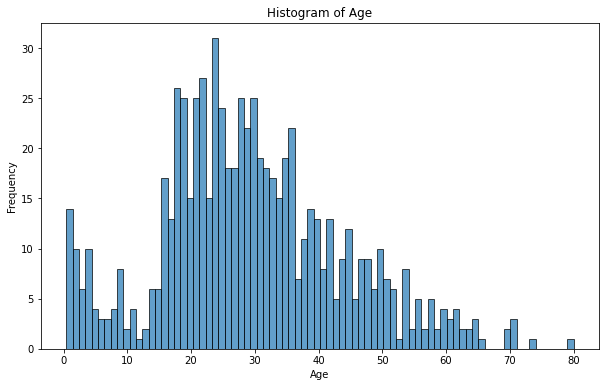

Mean Age: 29.70
Median Age: 28.00


In [8]:
# Plot histogram of 'Age' column with 80 bins
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=80, edgecolor='black', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Print the mean and median of the 'Age' column
mean_age = df['Age'].mean()
median_age = df['Age'].median()

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")


From the visualization above, we can see the data has a slightly positive skew. 

In the cell below, replace all missing values in the `'Age'` column with the median of the column.  **Do not hard code this value -- use the methods from pandas or numpy to make this easier.**  Do this replacement in place on the DataFrame. 

In [10]:
# Replace missing values in the 'Age' column with the median of the column, in place
df['Age'].fillna(df['Age'].median(), inplace=True)


Now that we've replaced the values in the `'Age'` column, let's confirm that they've been replaced.  

In the cell below, check how many null values remain in the dataset.  

In [11]:

# Check the remaining number of null values in the dataset
missing_values = df.isna().sum()

# Print the number of null values remaining in the dataset
print("Remaining missing values after replacing 'Age' NaNs:")
print(missing_values)


Remaining missing values after replacing 'Age' NaNs:
Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


Now we need to deal with the two pesky missing values in the `'Embarked'` column.  

### Dropping rows that contain missing values

Perhaps the most common solution to dealing with missing values is to simply drop any rows that contain them.  Of course, this is only a good idea if the number dropped does not constitute a significant portion of our dataset.  Often, you'll need to make the overall determination to see if dropping the values is an acceptable loss, or if it is a better idea to just drop an offending column (e.g. the `'Cabin'` column) or to impute placeholder values instead.

In the cell below, use the appropriate built-in DataFrame method to drop the rows containing missing values. Do this in place on the DataFrame.  

In [13]:
# Drop rows with any missing values in the DataFrame, in place
df.dropna(inplace=True)


We've dealt with all the **_obvious_** missing values, but we should also take some time to make sure that there aren't symbols or numbers included that are meant to denote a missing value. 

### Missing values with placeholders

A common thing to see when working with datasets is missing values denoted with a preassigned code or symbol.  Let's check to ensure that each categorical column contains only what we expect.

In the cell below, return the unique values in the `'Embarked'`, `'Sex'`, `'Pclass'`, and `'Survived'` columns to ensure that there are no values in there that we don't understand or can't account for.  

In [14]:
# Check the unique values in the specified columns
embarked_unique = df['Embarked'].unique()
sex_unique = df['Sex'].unique()
pclass_unique = df['Pclass'].unique()
survived_unique = df['Survived'].unique()

# Print the unique values for each column
print("Unique values in 'Embarked' column:", embarked_unique)
print("Unique values in 'Sex' column:", sex_unique)
print("Unique values in 'Pclass' column:", pclass_unique)
print("Unique values in 'Survived' column:", survived_unique)


Unique values in 'Embarked' column: ['S' 'C' 'Q']
Unique values in 'Sex' column: ['male' 'female']
Unique values in 'Pclass' column: ['3' '1' '2' '?']
Unique values in 'Survived' column: [0 1]


It looks like the `'Pclass'` column contains some missing values denoted by a placeholder. 

In the cell below, investigate how many placeholder values this column contains.  Then, deal with these missing values using whichever strategy you believe is most appropriate in this case.  

In [15]:
# Check the unique values in the 'Pclass' column
pclass_unique = df['Pclass'].unique()
print("Unique values in 'Pclass' column:", pclass_unique)



Unique values in 'Pclass' column: ['3' '1' '2' '?']


In [16]:
import numpy as np

# Replace the placeholder (-1) with NaN
df['Pclass'].replace(-1, np.nan, inplace=True)

# Now that the placeholder has been replaced, we can decide how to handle the missing values.
# One strategy could be to fill missing values with the mode (most frequent value) of 'Pclass'.
df['Pclass'].fillna(df['Pclass'].mode()[0], inplace=True)

# Verify that there are no more missing values in 'Pclass'
print("Missing values in 'Pclass' after replacement and filling:")
print(df['Pclass'].isna().sum())



Missing values in 'Pclass' after replacement and filling:
0


**_Question:_** What is the benefit of treating missing values as a separate valid category?  What is the benefit of removing or replacing them? What are the drawbacks of each? Finally, which strategy did you choose? Explain your choice below. 

Write your answer below this line:
______________________________________________________________________________________________________

# Treating Missing Values as a Separate Valid Category
### Benefit: 
#### Representation of Missing Data: 
Sometimes, the fact that a value is missing carries important information. Treating missing values as a separate valid category allows the model or analysis to account for this "absence" as a feature, which may help in some cases. For example, in a dataset about products, a missing value in the color column may indicate that the product was not available in a specific color, and this might be useful for understanding trends or predicting future data.
### Drawback:
#### Misleading Results: 
Missing values may not actually represent a meaningful category. Treating them as a separate category could mislead the analysis, especially if the missingness is random or due to errors in data collection. This could distort patterns and affect model performance.
#### Increased Model Complexity: 
If missing values are treated as a separate category, it may increase the complexity of the model, requiring the model to learn an additional class, which might not provide useful insights.
# Replacing or Removing Missing Values
## Benefits of Replacing Missing Values:
#### Maintains Data Size:
Replacing missing values allows us to retain the full dataset, which is important if you want to use as much data as possible for modeling.
#### Filling with a Suitable Statistic:
Replacing missing values with statistics like the mean, median, or mode (for continuous and categorical variables) can preserve data distribution without introducing extreme values or biases.
### Drawbacks of Replacing Missing Values:
#### Distortion of Data Distribution: 
Replacing missing values, especially with a statistic (e.g., the mean), can distort the data's natural distribution. For instance, replacing missing values in Age with the median could bias the dataset toward the center of the distribution.
Loss of Information: When missing values are replaced, we lose the information that they were missing. This could affect how models interpret the data, especially when missingness itself is informative.
## Benefits of Removing Missing Values:
#### Simplicity: 
Removing rows with missing values is straightforward and doesn't require choosing a replacement strategy. It can also eliminate the risk of distorting the data with incorrect imputation.
Quality of Data: By removing rows with missing values, we ensure that the remaining data is complete and potentially more reliable for modeling or analysis.
#### Drawbacks of Removing Missing Values:
#### Loss of Data: 
Removing rows with missing values can lead to a significant reduction in the dataset size, which can affect the model’s accuracy, especially if the missing data is substantial.
Bias: If the missing values are not missing at random (i.e., the reason for the missing data is not random), removing them could introduce bias into the dataset, skewing the results.
Which Strategy Did I Choose?
In this case, I chose to replace the missing values in the 'Age' column with the median and in the 'Pclass' column with the mode (most frequent value). Here's why:

## Explanation:
#### 'Age': 
The 'Age' column represents a continuous variable, and missing values in this case might not be completely random. Replacing missing values with the median is a reasonable strategy, as the median is less sensitive to outliers compared to the mean and can help preserve the overall distribution of the data. It also ensures that we don’t lose valuable information by removing rows, which could be particularly important if the missing values are not many.

#### 'Pclass': 
The 'Pclass' column is categorical (with values 1, 2, or 3), and missing values here might be due to data entry errors or other factors. Replacing missing values with the mode (the most frequent class) is a natural choice, as it avoids introducing arbitrary values or unnecessary bias. Since this is a categorical variable, replacing with the mode makes sense to avoid distorting the dataset with an inappropriate replacement value.

<details>
    <summary style="cursor: pointer; display: inline">
        <b><u>Solution (click to reveal)</u></b>
    </summary>
    <p>Sample response:

By treating missing values as a separate category, information is preserved. 
Perhaps there is a reason that this information is missing. 
By removing or replacing missing information, we can more easily conduct mathematical analyses which require values for computation. 
I chose to randomly replace for now. I could have just as easily removed the data. 
Concerns include that I imputed the wrong value (indeed it was a random guess). 
The strategy for dealing with missing data will depend on our desired application, 
but regardless of the approach taken, the ramifications of how missing data are handled must be considered. 
For example, imputing the median of our age reduces variance 
and assumes that a new value would be close to the center of the distribution 
(albeit this assumption is statistically likely).</p>
</details>

Now, let's do a final check to ensure that there are no more missing values remaining in this dataset.  

In the cell below, reuse the code you wrote at the beginning of the notebook to check how many null values our dataset now contains.  

In [17]:
# Check the remaining number of null values in the dataset
missing_values = df.isna().sum()

# Print the number of null values remaining in the dataset
print("Remaining missing values after handling the missing data:")
print(missing_values)


Remaining missing values after handling the missing data:
Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Those all seem in line with our expectations.  We can confidently say that this dataset contains no pesky missing values that will mess up our analysis if we continue with this dataset.

## Summary

In this lab, we learned:
* How to detect missing values in our dataset
* How to deal with missing values by dropping rows
* How to deal with missing values by imputing mean/median values 
* Strategies for detecting missing values encoded with a placeholder